# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
np.random = np.random

#%matplotlib inline

In [16]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'orange', 'olive', 'gray']  
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



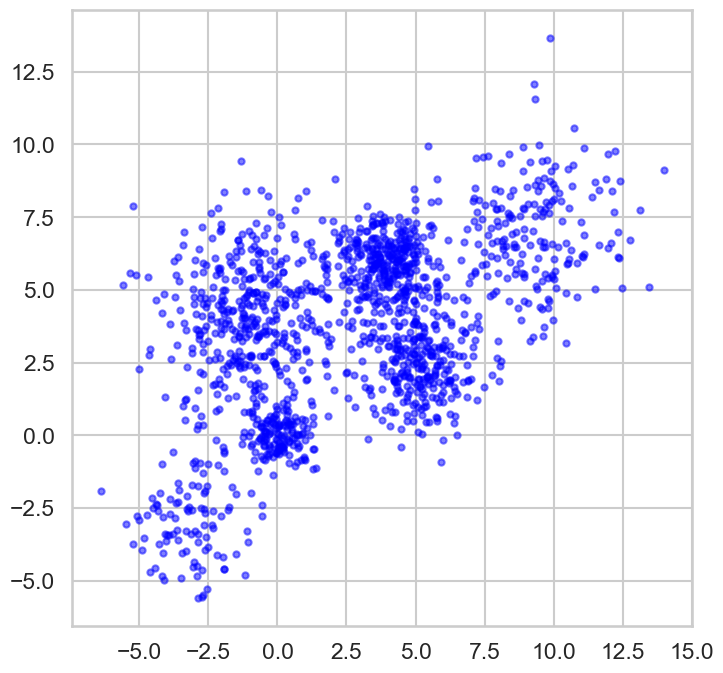

In [31]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### K-means 
* Use K-means with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the appropriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [12]:
def kmean(X):
    k_values = range(2, 10)
    distortion_function = []
    silhouette_scores = []



    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distortion_function.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        
        display_cluster(X,kmeans,k)
        plt.figure()

        
    # Distortion function versus K plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, distortion_function, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Distortion vs K')
        
    plt.show()

    # Silhouette_score versus K plot
    plt.figure(figsize=(8, 4))
    plt.plot(k_values, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs K')
    plt.show()


    best_k = k_values[np.argmax(silhouette_scores)]
    best_silhouette_score = np.max(silhouette_scores)
    print(f"Best number of clusters: {best_k}")
    print(f"The silhouette score {best_k} clusters is: {best_silhouette_score}")


#kmean(Multi_blob_Data)



### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of parameters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
def hier_clustering(X,distance_thresholds):

    # scaler = StandardScaler()
    # scaled_data = scaler.fit_transform(Multi_blob_Data)

    affinities = ['euclidean',  'cosine','cityblock']  ## Manhattan function is called cityblock in python 'distance.py' file in packages
    linkage_methods = ['average','single']

    best_score = -1  
    best_params = {}

    for affinity in affinities:
        for linkage_method in linkage_methods:
            for distance_threshold in distance_thresholds:
                model = AgglomerativeClustering(n_clusters=None, metric=affinity, linkage=linkage_method, distance_threshold=distance_threshold)
                clusters = model.fit_predict(X)


                Z = linkage(X, method=linkage_method,metric=affinity)

                plt.figure(figsize=(8, 6))
                plt.title(f'Dendrogram - Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}')
                dendrogram(Z)
                plt.xlabel('Sample Index')
                plt.ylabel('Cluster Distance')
                plt.show()

                try:
                    score = silhouette_score(X, clusters)

                    if score > best_score:
                        best_score = score
                        best_params['Affinity'] = affinity
                        best_params['Linkage'] = linkage_method
                        best_params['Distance Threshold'] = distance_threshold

                except ValueError as e:
                    print(e)

    print("Best Silhouette Score:", best_score)
    print("Best Parameters:", best_params)


    
distance_thresholds = [2000,4000,6000,8000,50,100,150,200,0.02,0.04,0.06]
#hier_clustering(Multi_blob_Data,distance_thresholds)


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of parameters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [66]:
def dbscan_clustering(X):    
    eps_values = np.array([0.1, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
    min_samples_values = np.arange(5, 26)

    best_eps = None
    best_min_samples = None
    best_silhouette_score = -1

    silhouette_scores = []
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # plt.figure(figsize=(6,4))
            # plt.plot(len(eps_values), len(min_samples_values))
            # plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
            # plt.title(f'EPS={eps}, Min Samples={min_samples}')
            # plt.xlabel('Feature 1')
            # plt.ylabel('Feature 2')
            # plt.tight_layout()
            # plt.show()
            
            try:
                silhouette = silhouette_score(X, labels)
                silhouette_scores.append((eps, min_samples, silhouette))
                
                if silhouette > best_silhouette_score:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_silhouette_score = silhouette
                    
            except ValueError as e:
                print(f"Error occurred for EPS={eps}, Min Samples={min_samples}: {e}")

    silhouette_scores = np.array(silhouette_scores)
    plt.figure(figsize=(10, 6))
    print(silhouette_scores)
    plt.scatter(silhouette_scores[:, 0], silhouette_scores[:, 1], c=silhouette_scores[:, 2], cmap='viridis')
    plt.colorbar(label='Silhouette Score')
    plt.xlabel('EPS')
    plt.ylabel('Min Samples')
    plt.title('Silhouette Score vs. EPS and Min Samples')
    plt.show()

    best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    best_labels = best_dbscan.fit_predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', marker='.')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    print(f"Best EPS: {best_eps}")
    print(f"Best Min Samples: {best_min_samples}")
    print(f"Best Silhouette Score: {best_silhouette_score}")


#dbscan_clustering(Multi_blob_Data)


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [44]:
def gaus_mix(X):


    covariance_types = ['full', 'tied', 'diag', 'spherical']

    gmm_models = []
    probability_fits = []

    for cov_type in covariance_types:
        gmm = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=42)
        gmm.fit(X)
        gmm_models.append(gmm)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        probability_fits.append(Z)

    plt.figure(figsize=(12, 8))
    for i, cov_type in enumerate(covariance_types):
        plt.subplot(2, 2, i + 1)
        plt.scatter(X[:, 0], X[:, 1], marker='.', c='gray', alpha=0.5)
        plt.contour(xx, yy, probability_fits[i], levels=10, cmap='viridis')
        plt.title(f'Covariance Type: {cov_type}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()

#gaus_mix(Multi_blob_Data)
    


# def gaus_mix(X):
#     n_features = X.shape[1]
#     covariance_types = ['full', 'tied', 'diag', 'spherical']

#     gmm_models = []
#     probability_fits = []

#     for cov_type in covariance_types:
#         gmm = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=42)
#         gmm.fit(X)
#         gmm_models.append(gmm)
        
#         mins = X.min(axis=0) - 1
#         maxs = X.max(axis=0) + 1
#         meshgrid_steps = [0.1] * n_features  # Larger step size
#         meshgrid_ranges = [np.arange(mins[i], maxs[i], meshgrid_steps[i]) for i in range(n_features)]
#         meshgrid = np.meshgrid(*meshgrid_ranges)
#         meshgrid_points = np.vstack([meshgrid[i].ravel() for i in range(n_features)]).T
        
#         Z = -gmm.score_samples(meshgrid_points)
#         Z = Z.reshape(meshgrid[0].shape)
#         probability_fits.append(Z)

#     plt.figure(figsize=(12, 8))
#     for i, cov_type in enumerate(covariance_types):
#         plt.subplot(2, 2, i + 1)
#         plt.scatter(X[:, 0], X[:, 1], marker='.', c='gray', alpha=0.5)
#         plt.contour(meshgrid[0], meshgrid[1], probability_fits[i], levels=10, cmap='viridis')
#         plt.title(f'Covariance Type: {cov_type}')
#         plt.xlabel('Feature 1')
#         plt.ylabel('Feature 2')
#     plt.tight_layout()
#     plt.show()

# Example usage
# gaus_mix(Multi_blob_Data)




## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


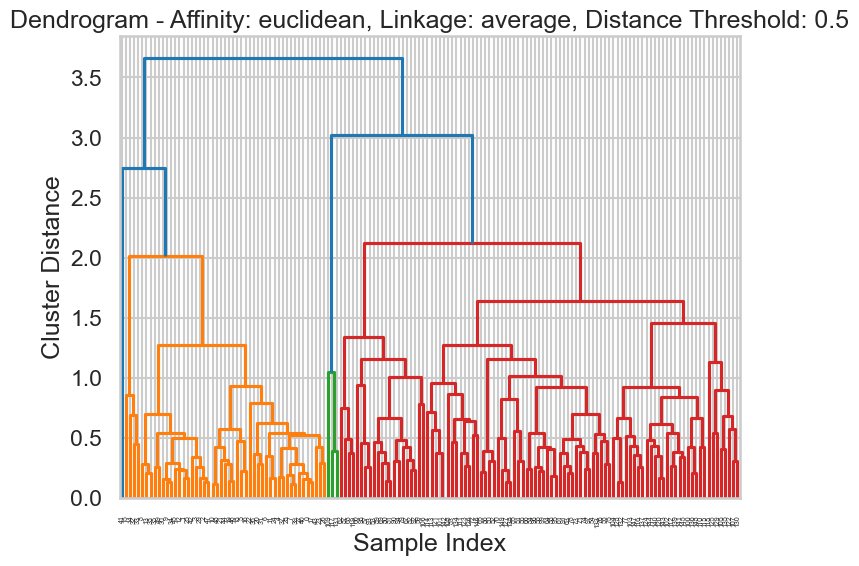

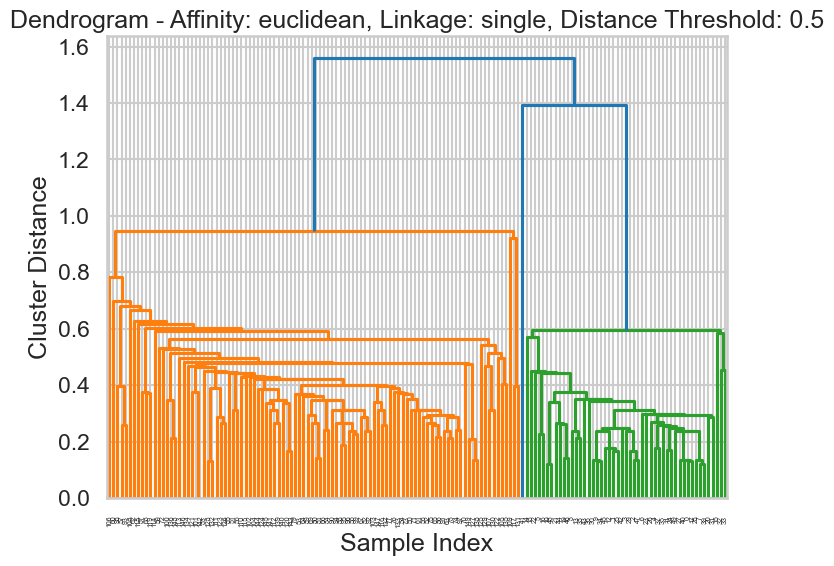

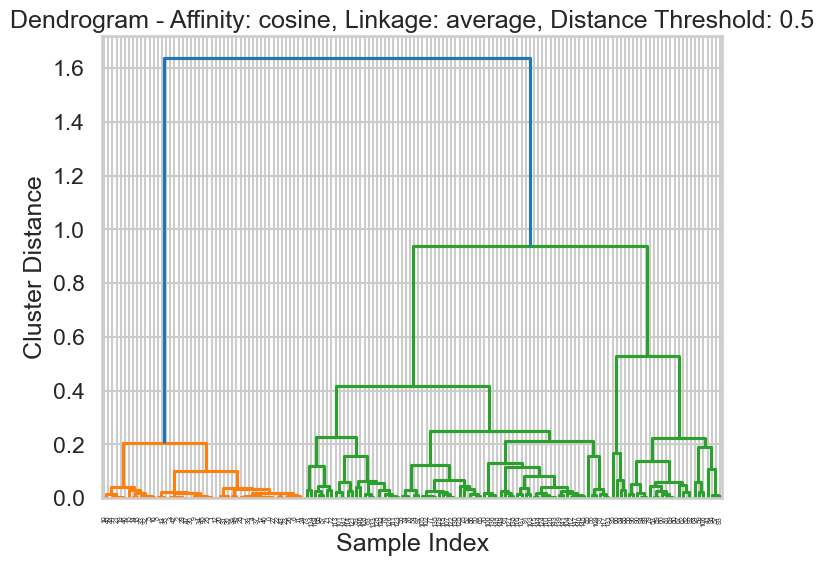

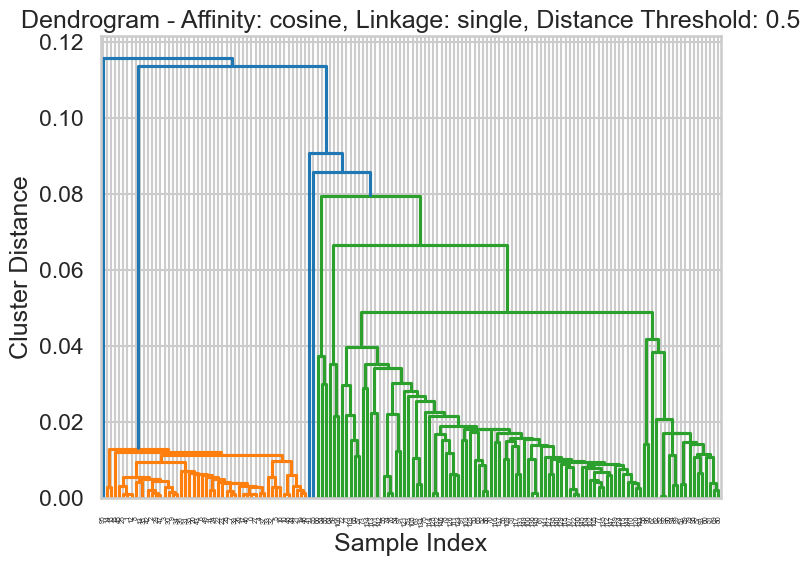

Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


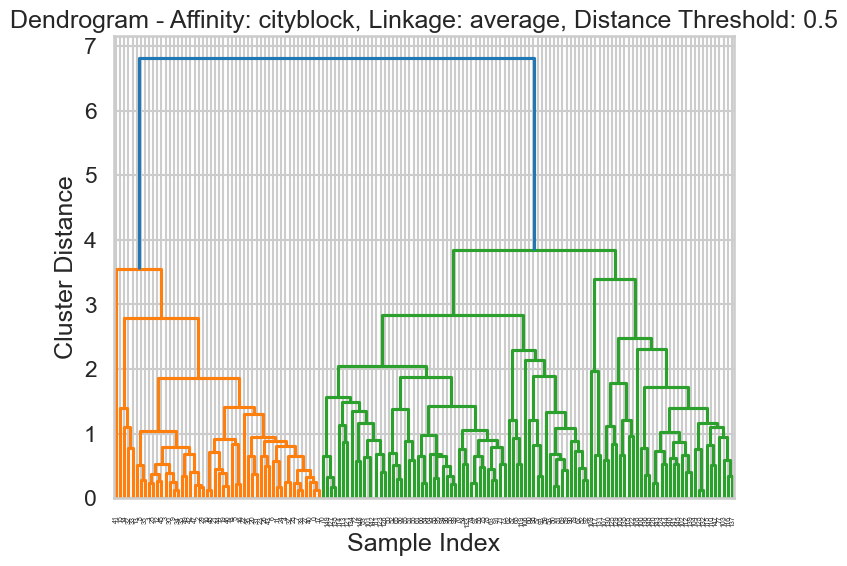

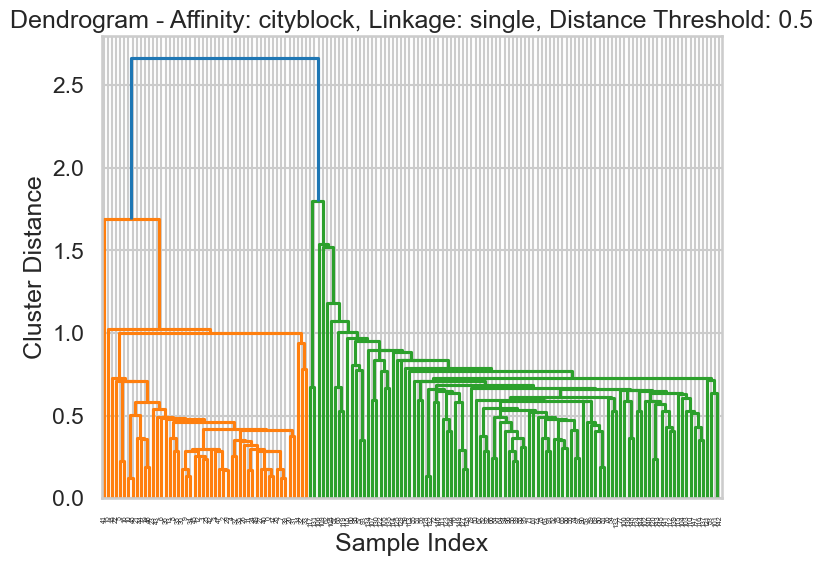

Best Silhouette Score: 0.26847155173255327
Best Parameters: {'Affinity': 'euclidean', 'Linkage': 'average', 'Distance Threshold': 0.5}


In [61]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

#kmean(iris_data.data)

distance_thresholds = [1,2,3,0.5,0.75,1,1.5,0.004,0.006,0.008,0.01]
#hier_clustering(iris_data.data,distance_thresholds)

#dbscan_clustering(iris_data.data)
#gaus_mix(iris_data.data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data.data)

#kmean(scaled_data)

distance_thresholds = [1.5,2,2.5,3,1,0.75,0.65,0.7,0.68,0.1,0.13,0.16,0.2,0.035,0.04,0.045,0.05,0.07,0.08,1.25]
#hier_clustering(scaled_data,distance_thresholds)

#dbscan_clustering(scaled_data)
#gaus_mix(scaled_data)




* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

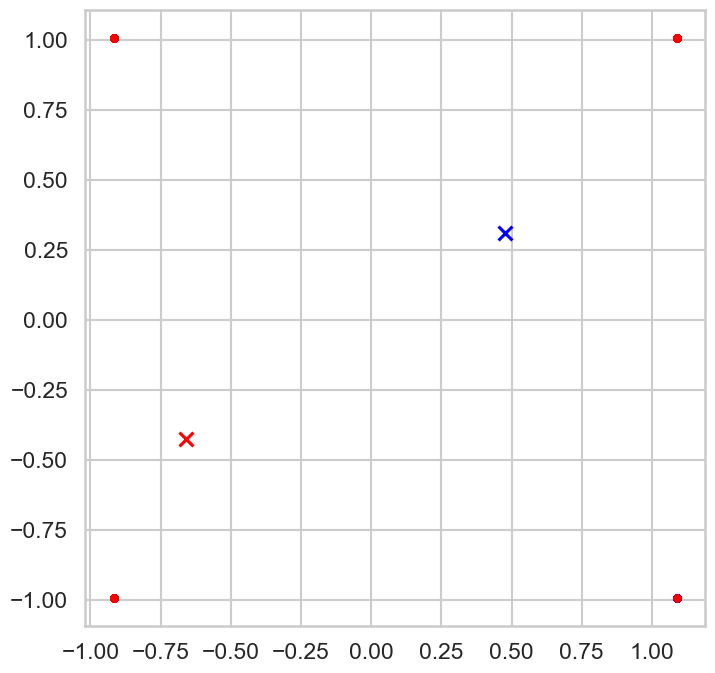

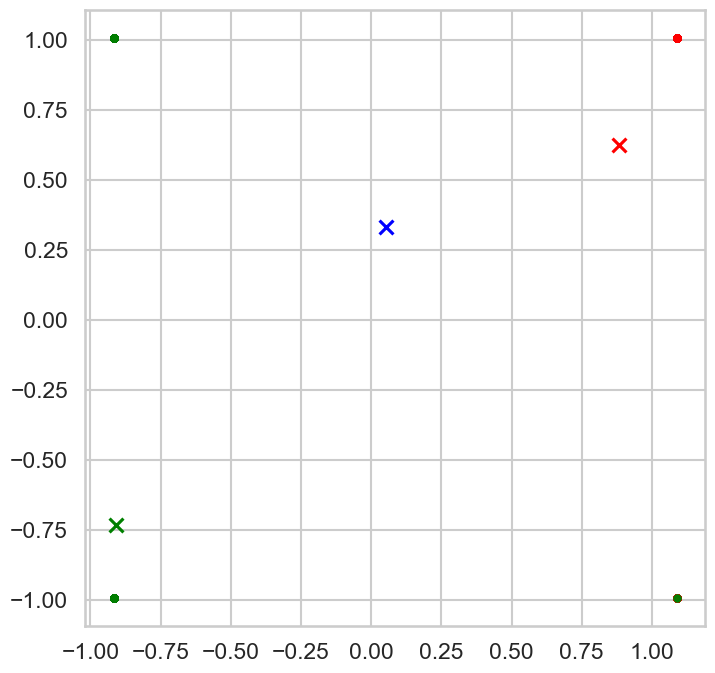

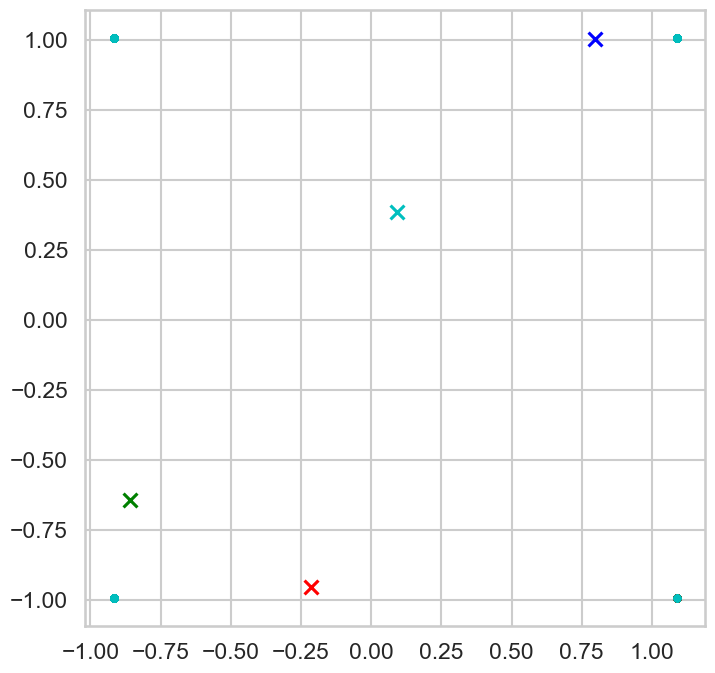

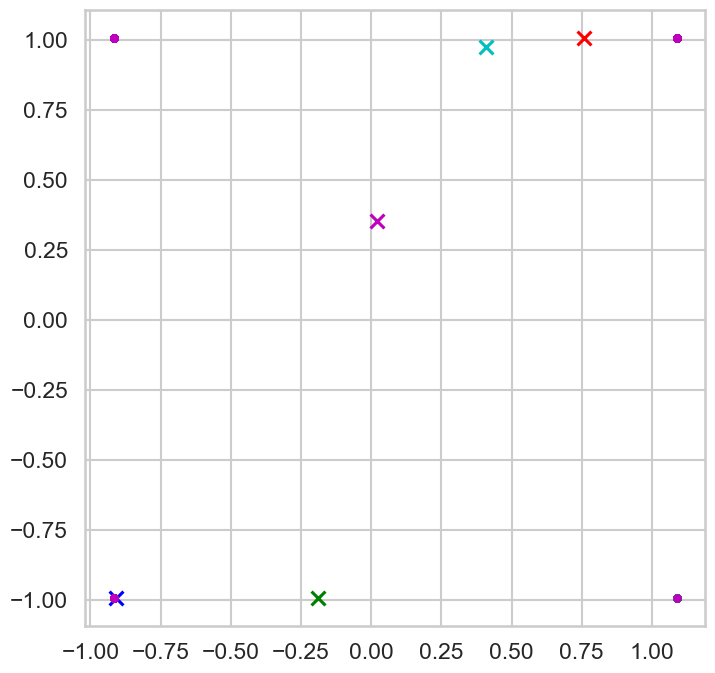

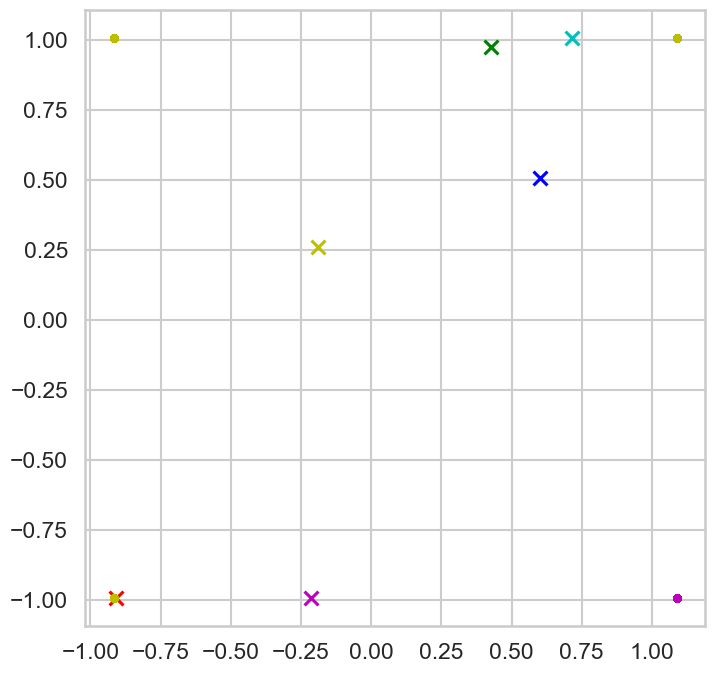

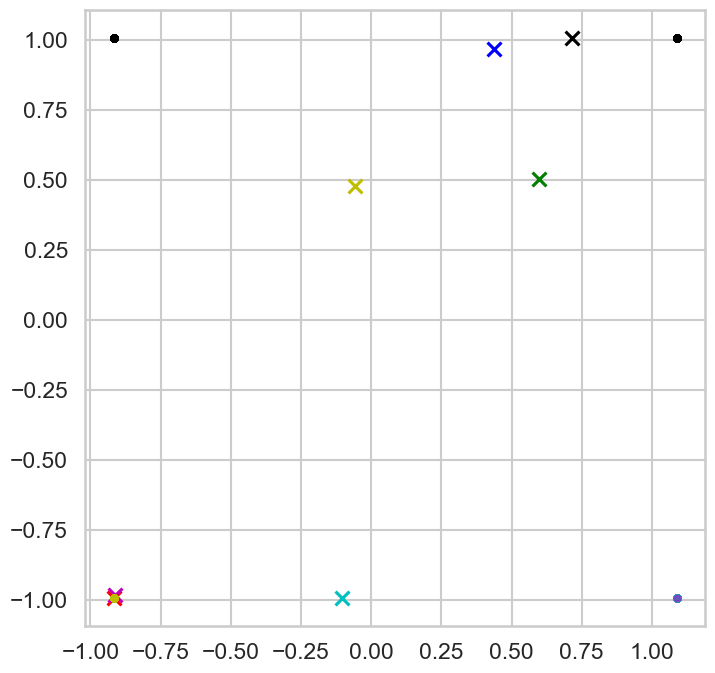

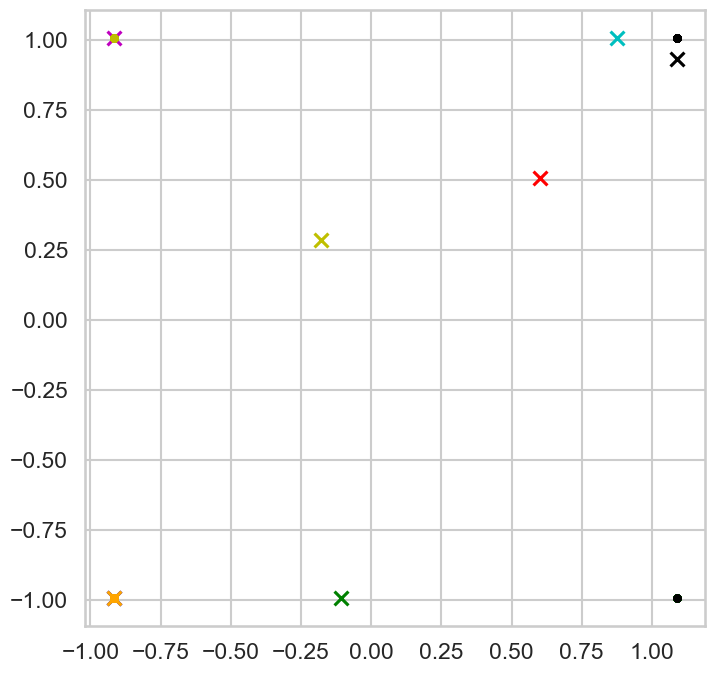

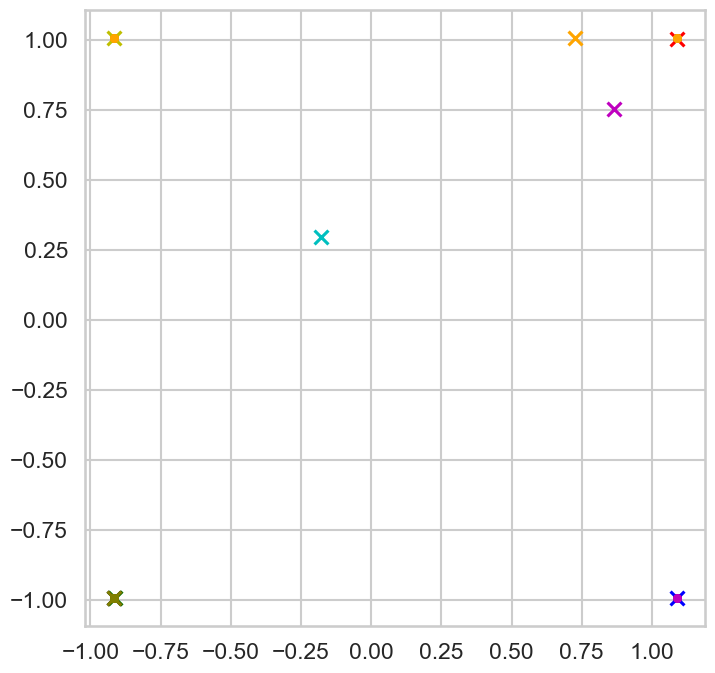

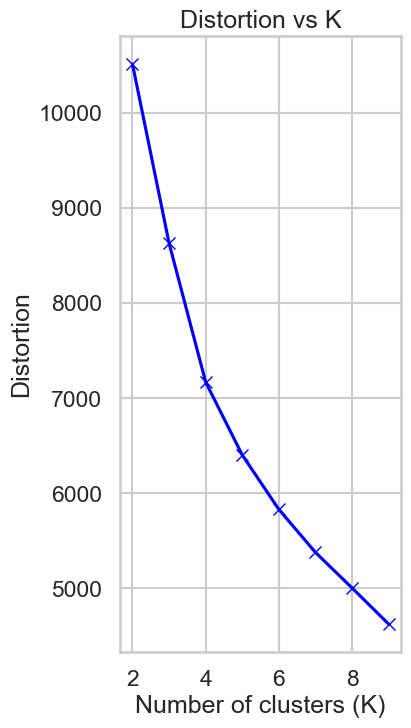

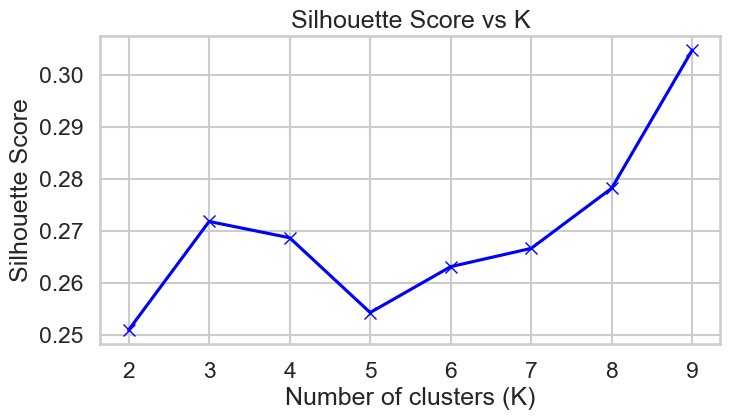

Best number of clusters: 9
The silhouette score 9 clusters is: 0.30474761694210156


In [73]:
dataset = pd.read_csv("Customer_data.csv")

#X=dataset.values
X = dataset.iloc[:, 1:].values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

kmean(scaled_data)

distance_thresholds = [3,3.5,4,1.8,2,2.2,0.6,0.7,0.8,0.9,0.17,0.18,6,7,8,9,2.5]
#hier_clustering(scaled_data,distance_thresholds)

#dbscan_clustering(scaled_data)


